In [1]:
import matplotlib.pyplot as plt
from detectron2.data import DatasetCatalog, MetadataCatalog
from PIL import Image
from register_dataset import register_smiles_dataset_splits
import random

In [2]:
register_smiles_dataset_splits(
    dataset_dir="../dataset",
)
smiles_metadata = MetadataCatalog.get("smiles_train")
smiles_dataset = DatasetCatalog.get("smiles_train")

✓ Registered SMILES dataset splits:
  Train: 4000 images (80%)
  Val: 1000 images (20%)
  Categories: ['AROMATIC-NONE', 'ATOM', 'DOUBLE-NONE', 'SINGLE-BEGINDASH', 'SINGLE-BEGINWEDGE', 'SINGLE-NONE']


In [13]:
def plot_example(cat_id: int):
    sample = next(s for s in smiles_dataset if any(ann["category_id"] == cat_id for ann in s["annotations"]))
    img = Image.open(sample["file_name"])
    colors = [(random.random(), random.random(), random.random()) for _ in sample["annotations"]]
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(img)

    for ann, color in zip(sample["annotations"], colors):
        if not ann["category_id"] == cat_id:
            continue
        for poly in ann["segmentation"]:
            x = poly[::2]
            y = poly[1::2]
            ax.plot(x, y, linewidth=1, color=color)
            ax.fill(x, y, color=color + (0.5,))

    ax.axis('off')
    return fig, ax

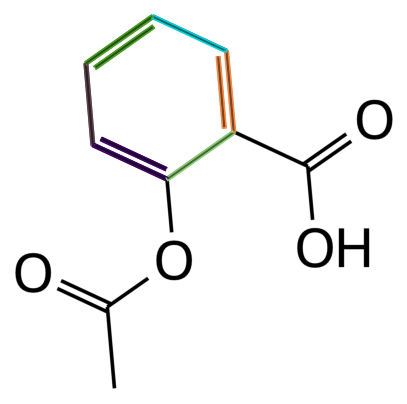

In [22]:
fig, ax = plot_example(0)
fig.savefig("../images/sample-0.png")

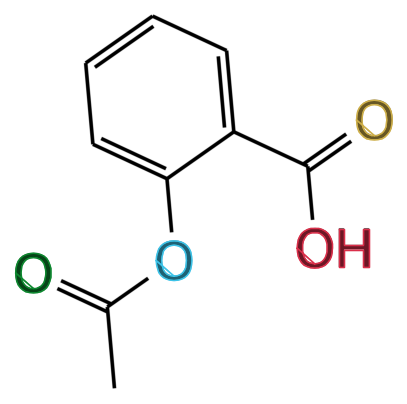

In [23]:
fig, ax = plot_example(1)
fig.savefig("../images/sample-1.png")

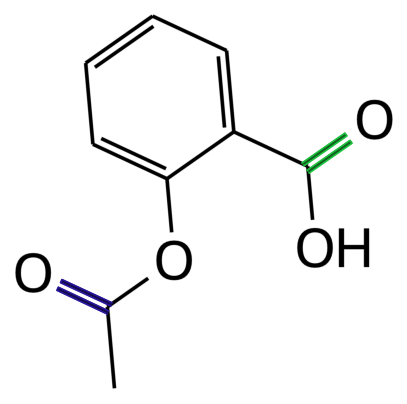

In [24]:
fig, ax = plot_example(2)
fig.savefig("../images/sample-2.png")

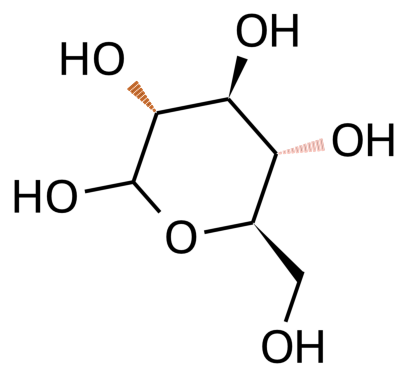

In [25]:
fig, ax = plot_example(3)
fig.savefig("../images/sample-3.png")

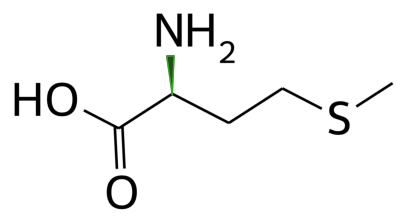

In [26]:
fig, ax = plot_example(4)
fig.savefig("../images/sample-4.png")

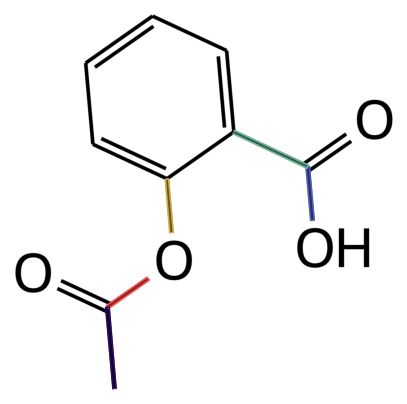

In [27]:
fig, ax = plot_example(5)
fig.savefig("../images/sample-5.png")